In [1]:
import pandas as clickbait_panns
import re as clickbait_r
import string as clickbait_str
import nltk as clickbait_ntk
import numpy as clickbait_nmp
from nltk.tokenize import word_tokenize as clickbait_wtoken
from nltk.corpus import stopwords as clickbait_stw
from nltk.stem import PorterStemmer as clickbait_ps, WordNetLemmatizer as clickbait_wl
import pickle as clickbait_pic
import warnings as clickbait_wngs
clickbait_wngs.filterwarnings('ignore')
import matplotlib.pyplot as clickbait_mat
import seaborn as clickbait_sb

clickbait_ntk.download('punkt_tab')
clickbait_ntk.download('stopwords')
clickbait_ntk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:

load_clickbait = 'clickbait_data.csv'
click_bait_detection = clickbait_panns.read_csv(load_clickbait)
print(click_bait_detection.head())
print("\nShape of Clickbait Data:", click_bait_detection.shape)

                                            headline  clickbait
0                                 Should I Get Bings          1
1      Which TV Female Friend Group Do You Belong In          1
2  The New "Star Wars: The Force Awakens" Trailer...          1
3  This Vine Of New York On "Celebrity Big Brothe...          1
4  A Couple Did A Stunning Photo Shoot With Their...          1

Shape of Clickbait Data: (32000, 2)


In [4]:
click_bait_detection

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [5]:
clickbait_panns.set_option('display.max_colwidth', None)
click_bait_detection

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer Is Here To Give You Chills",1
3,"This Vine Of New York On ""Celebrity Big Brother"" Is Fucking Perfect",1
4,A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a Shoe",0
31996,"British Liberal Democrat Patsy Calton, 56, dies of cancer",0
31997,Drone smartphone app to help heart attack victims in remote areas announced,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to Denounce Iran",0


In [6]:
print(click_bait_detection['headline'][:10])

0                                                                                      Should I Get Bings
1                                                           Which TV Female Friend Group Do You Belong In
2                               The New "Star Wars: The Force Awakens" Trailer Is Here To Give You Chills
3                                     This Vine Of New York On "Celebrity Big Brother" Is Fucking Perfect
4    A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor
5                                   How To Flirt With Queer Girls Without Making A Total Fool Of Yourself
6                                               32 Cute Things To Distract From Your Awkward Thanksgiving
7                                                                  If Disney Princesses Were From Florida
8                                             What's A Quote Or Lyric That Best Describes Your Depression
9        Natalie Dormer And Sam Claflin Play A

In [7]:
print(click_bait_detection['headline'][31989:])

31989                                British military secrets leaked on social networking sites
31990                                                 Bainimarama sworn in as Fiji caretaker PM
31991                                                Iran's Supreme Leader wants religious army
31992                                                 Albanian girl murdered in tangle of crime
31993                                        Pentagon unable to explain 'mystery missile' video
31994    Blair: G8 leaders announce $50 billion aid increase; talks on trade and climate change
31995                                       To Make Female Hearts Flutter in Iraq, Throw a Shoe
31996                                 British Liberal Democrat Patsy Calton, 56, dies of cancer
31997               Drone smartphone app to help heart attack victims in remote areas announced
31998                                Netanyahu Urges Pope Benedict, in Israel, to Denounce Iran
31999                                   

In [8]:
print("\nClickbait Output:", click_bait_detection['clickbait'].value_counts())
print("\nClickbait Null:\n", click_bait_detection.isnull().sum())
print("\nClickbait Duplicates:", click_bait_detection.duplicated().sum())


Clickbait Output: clickbait
0    16001
1    15999
Name: count, dtype: int64

Clickbait Null:
 headline     0
clickbait    0
dtype: int64

Clickbait Duplicates: 0


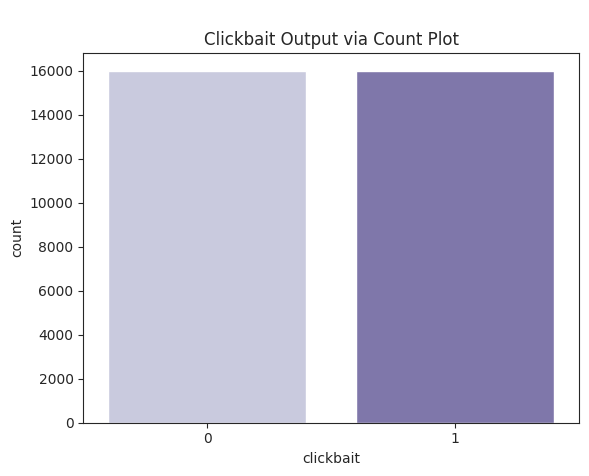

In [9]:

clickbait_sb.set_style('ticks')
clickbait_mat.title('\nClickbait Output via Count Plot')
clickbait_sb.countplot(x = 'clickbait', data = click_bait_detection, palette = 'Purples')
clickbait_mat.show()

In [10]:
## Headline preprocessing function
def clickbait_preprocess_headlines(head):
    clickbait_stop_words = set(clickbait_stw.words('english'))
    clickbait_stemmer = clickbait_ps()
    clickbait_lemmatizer = clickbait_wl()

    head = head.lower()
    head = clickbait_r.sub(r'http\S+|www\S+', '', head)
    head = head.translate(str.maketrans('', '', clickbait_str.punctuation))

    clickbait_words = clickbait_wtoken(head)  ## Clickbait Tokenization
    clickbait_words = [word for word in clickbait_words if word not in clickbait_stop_words] ## Clickbait stopwords
    clickbait_words = [clickbait_stemmer.stem(word) for word in clickbait_words] ## Clickbait stemming
    clickbait_words = [clickbait_lemmatizer.lemmatize(word) for word in clickbait_words] ## Clickbait lemmatization
    return ' '.join(clickbait_words)

click_bait_detection['Processed_Headline'] = click_bait_detection['headline'].apply(clickbait_preprocess_headlines)
click_bait_detection

,headline,clickbait,Processed_Headline
0,Should I Get Bings,1,get bing
1,Which TV Female Friend Group Do You Belong In,1,tv femal friend group belong
2,"The New ""Star Wars: The Force Awakens"" Trailer Is Here To Give You Chills",1,new star war forc awaken trailer give chill
3,"This Vine Of New York On ""Celebrity Big Brother"" Is Fucking Perfect",1,vine new york celebr big brother fuck perfect
4,A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor,1,coupl stun photo shoot babi learn inoper brain tumor
...,...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a Shoe",0,make femal heart flutter iraq throw shoe
31996,"British Liberal Democrat Patsy Calton, 56, dies of cancer",0,british liber democrat patsi calton 56 die cancer
31997,Drone smartphone app to help heart attack victims in remote areas announced,0,drone smartphon app help heart attack victim remot area announc
31998,"Netanyahu Urges Pope Benedict, in Israel, to Denounce Iran",0,netanyahu urg pope benedict israel denounc iran


In [11]:
clickbait_panns.set_option('display.max_colwidth', None)
click_bait_detection['Processed_Headline']

,Processed_Headline
0,get bing
1,tv femal friend group belong
2,new star war forc awaken trailer give chill
3,vine new york celebr big brother fuck perfect
4,coupl stun photo shoot babi learn inoper brain tumor
...,...
31995,make femal heart flutter iraq throw shoe
31996,british liber democrat patsi calton 56 die cancer
31997,drone smartphon app help heart attack victim remot area announc
31998,netanyahu urg pope benedict israel denounc iran


In [12]:
click_bait_detection

,headline,clickbait,Processed_Headline
0,Should I Get Bings,1,get bing
1,Which TV Female Friend Group Do You Belong In,1,tv femal friend group belong
2,"The New ""Star Wars: The Force Awakens"" Trailer Is Here To Give You Chills",1,new star war forc awaken trailer give chill
3,"This Vine Of New York On ""Celebrity Big Brother"" Is Fucking Perfect",1,vine new york celebr big brother fuck perfect
4,A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor,1,coupl stun photo shoot babi learn inoper brain tumor
...,...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a Shoe",0,make femal heart flutter iraq throw shoe
31996,"British Liberal Democrat Patsy Calton, 56, dies of cancer",0,british liber democrat patsi calton 56 die cancer
31997,Drone smartphone app to help heart attack victims in remote areas announced,0,drone smartphon app help heart attack victim remot area announc
31998,"Netanyahu Urges Pope Benedict, in Israel, to Denounce Iran",0,netanyahu urg pope benedict israel denounc iran


In [ ]:
click_bait_detection.to_csv('clickbait_detection_file.csv', index=False)
click_bait_detection.shape

(32000, 3)